In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Climbing_Route_Project')

In [3]:
from cgan import *
from datautils import *
from dcgan import *
from ptclassifier import *
from scikitclassandregr import *

In [0]:
data_path = '/content/drive/My Drive/Climbing_Route_Project/problems2017.txt'

f = open(data_path)
l = f.readline()
l = f.readline()
d = []
d2 = []
while l != ']':
  d.append(eval(l))
  d2.append(eval(l))
  l = f.readline()
t = type(d[0])
for i,dic in enumerate(d):
  if type(dic) == t:
    d[i] = d[i][0]
    d2[i] = d2[i][0] 
for i,dic in enumerate(d):
  d[i]['moves'], d2[i]['moves'] = moveToArray(d[i]['moves'])

In [5]:
# inspect data structure
idx = np.random.randint(len(d))
print(d[idx])

{'name': 'LITTLE AIR', 'ID': 317266, 'setterGrade': '6B', 'userGrade': None, 'userRating': 2, 'repeats': 2, 'isBenchmark': False, 'moves': array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0

In [6]:
#For 3D data
x = []
y = []

# For 2D data
x_act = []
y_act = []

label_mode = int(input("Please enter mode for the class amount(0 - 3 Class, 1 - 8 Class, 2 - 14 Class):"))

for i,dic in enumerate(d):
    # Filter out by number of repetitions, but can use other criteria here...
    if int(dic['repeats']) >= 5:
        x.append(d[i]['moves'])
        y.append(grade2Label(d[i]['setterGrade'], label_mode))
        x_act.append(d2[i]['moves'])
        y_act.append(grade2Label(d2[i]['setterGrade'], label_mode))
        
print("Exported ", len(y_act), " routes out of ", len(d2), "in", data_path)

Please enter mode for the class amount(0 - 3 Class, 1 - 8 Class, 2 - 14 Class):0
Exported  8397  routes out of  20104 in /content/drive/My Drive/Climbing_Route_Project/problems2017.txt


In [7]:
# to ndarray
x = np.array(x)
y = np.array(y)

x_act = np.array(x_act)
y_act = np.array(y_act)

save_path = '/content/drive/My Drive/Climbing_Route_Project/moon_data.npz'
print("Storing ", x.shape, y.shape, "arrays to", save_path )
np.savez(save_path, x = x, y = y)

save_path2 = '/content/drive/My Drive/Climbing_Route_Project/moon_data.npz'
print("Storing ", x_act.shape, y_act.shape, "arrays to", save_path2 )
np.savez(save_path2, x = x_act, y = y_act)

Storing  (8397, 3, 11, 18) (8397,) arrays to /content/drive/My Drive/Climbing_Route_Project/moon_data.npz
Storing  (8397, 11, 18) (8397,) arrays to /content/drive/My Drive/Climbing_Route_Project/moon_data.npz


In [8]:
label_boi = np.unique(y_act).shape[0]
print("Label Amount: ",label_boi)
print("Actual Labels: ",np.unique(y_act))

3
[0 1 2]


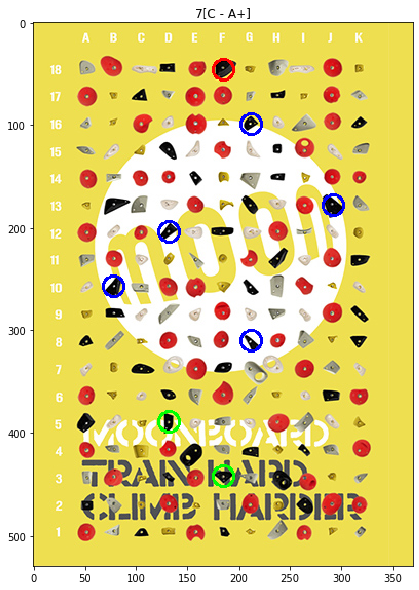

In [9]:
# visualize to make sure everything makes sense
idx = np.random.randint(x.shape[0])
x_ = x[idx].copy()
y_ = y[idx].copy()
visualize_sample(x_,y_, mode = "2017",label_mode = label_mode)

In [10]:
#PYT CLASSIFIER
epoch = int(input("Please enter epoch amount for PYT Classifier: "))
path = "/content/drive/My Drive/Climbing_Route_Project/"
torch_pyt = TorchClassifier(label_boi)
torch_pyt.import_data(x_act,y_act)
torch_pyt.display_full_data()
torch_pyt.split(False)
torch_pyt.display_split_data()
torch_pyt.data_to_loader()
torch_pyt.model_selection("custom")
torch_pyt.compile_model()
torch_pyt.train_model(path,epoch)

Welcome to Climbing Route Classifier!
GPU mode activated!(AFTER MODEL SELECTION)
X shape:  (8397, 11, 18)
Y shape:  (8397,)
X_train shape:  (6717, 11, 18)
Y_train shape:  (6717,)
X_test shape:  (1680, 11, 18)
Y_test shape:  (1680,)
Model chosen as custom !
Epoch 1/100
----------
Loss: 0.0343 Acc: 0.7539 m 0s
Validation Loss: 0.0346 Validation Acc: 0.7690
Saved model state: Validation accuracy performed better!
Epoch 2/100
----------
Loss: 0.0343 Acc: 0.7817 m 0s
Validation Loss: 0.0346 Validation Acc: 0.7917
Saved model state: Validation accuracy performed better!
Epoch 3/100
----------
Loss: 0.0343 Acc: 0.7874 m 0s
Validation Loss: 0.0346 Validation Acc: 0.7935
Saved model state: Validation accuracy performed better!
Epoch 4/100
----------
Loss: 0.0343 Acc: 0.7889 m 0s
Validation Loss: 0.0346 Validation Acc: 0.7946
Saved model state: Validation accuracy performed better!
Epoch 5/100
----------
Loss: 0.0343 Acc: 0.7916 m 0s
Validation Loss: 0.0346 Validation Acc: 0.7970
Saved model sta

KeyboardInterrupt: ignored

In [11]:
#DCGAN MODEL TRAINING
print("Train at least 20-30 epochs for valid routes")
epoch = int(input("Please enter epoch amount for CGAN: "))
path = "/content/drive/My Drive/Climbing_Route_Project/"
print(label_boi)
torch_dcgan = TorchDCGAN(label_boi)
print(torch_dcgan.label_boi)

torch_dcgan.import_data(x_act,y_act)
torch_dcgan.display_full_data()
torch_dcgan.split(False)
torch_dcgan.display_split_data()
torch_dcgan.data_to_loader()

torch_dcgan.model_selection("DCGan")
torch_dcgan.compile_model()
torch_dcgan.train_model(path,epoch)

3
Welcome to Climbing Route Generator!
GPU mode activated!(AFTER MODEL SELECTION)
3
X shape:  (8397, 11, 18)
Y shape:  (8397,)
X_train shape:  (8313, 11, 18)
Y_train shape:  (8313,)
X_test shape:  (84, 11, 18)
Y_test shape:  (84,)
Model chosen as DCGan !
Epoch 1/5
----------


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([32, 2, 2])) that is different to the input size (torch.Size([64, 2])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


[1/5] - ptime: 2.27, loss_d: 1.457, loss_g: 0.590, loss_comb: 1.024
Epoch 2/5
----------
[2/5] - ptime: 2.09, loss_d: 1.476, loss_g: 0.560, loss_comb: 1.018
Epoch 3/5
----------
[3/5] - ptime: 2.14, loss_d: 1.459, loss_g: 0.549, loss_comb: 1.004
Epoch 4/5
----------
[4/5] - ptime: 2.09, loss_d: 1.460, loss_g: 0.551, loss_comb: 1.005
learning rate decreased
Epoch 5/5
----------
[5/5] - ptime: 2.10, loss_d: 1.455, loss_g: 0.553, loss_comb: 1.004
Training finished! Saving results!


In [12]:
#CGAN MODEL TRAINING
print("Train at least 20-30 epochs for valid routes")
epoch = int(input("Please enter epoch amount for CGAN: "))
path = "/content/drive/My Drive/Climbing_Route_Project/"
torch_cgan = TorchCGAN(label_boi)
torch_cgan.import_data(x_act,y_act)
torch_cgan.display_full_data()
torch_cgan.split(False)
torch_cgan.display_split_data()
torch_cgan.data_to_loader()
torch_cgan.model_selection("CGan")
torch_cgan.compile_model()
torch_cgan.train_model(path,epoch)

Welcome to Climbing Route Generator!
GPU mode activated!(AFTER MODEL SELECTION)
X shape:  (8397, 11, 18)
Y shape:  (8397,)
X_train shape:  (8313, 11, 18)
Y_train shape:  (8313,)
X_test shape:  (84, 11, 18)
Y_test shape:  (84,)
Model chosen as CGan !
Epoch 1/5
----------
[1/5] - ptime: 1.29, loss_d: 1.412, loss_g: 0.663, loss_comb: 1.037
Epoch 2/5
----------
[2/5] - ptime: 1.31, loss_d: 1.446, loss_g: 0.630, loss_comb: 1.038
Epoch 3/5
----------
[3/5] - ptime: 1.28, loss_d: 1.473, loss_g: 0.605, loss_comb: 1.039
Epoch 4/5
----------
[4/5] - ptime: 1.27, loss_d: 1.482, loss_g: 0.596, loss_comb: 1.039
Epoch 5/5
----------
[5/5] - ptime: 1.30, loss_d: 1.479, loss_g: 0.594, loss_comb: 1.037
Training finished! Saving results!


In [13]:
labels, labels2, test_images_c, test_images_dc = LabelGANResults(torch_cgan,torch_dcgan, torch_pyt, False)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
#CGAN VISUALIZATION FOR PYT CLASSIFIER
view_results(test_images_c, 0.8,20, torch_cgan, labels, label_mode)

In [0]:
#DCGAN VISUALIZATION FOR PYT CLASSIFIER
view_results(test_images_dc, 0.9,20, torch_dcgan,labels2,label_mode)

In [26]:
#REGRESSOR MODELS
res_list = []
print("Default model: randomforest")
reg_model = input("Choose the model for the regression of the labels[mlp,linear,adaboost,randomforest]:")
if reg_model == "mlp":
    torch_man = RegressorSklearn("mlp")
elif reg_model == "linear":
    torch_man =  RegressorSklearn("linear")
elif reg_model == "adaboost":
    torch_man = RegressorSklearn("adaboost")
else:
    torch_man = RegressorSklearn("randomforest")
print(torch_man.selection)
torch_man.import_data(x_act,y_act)
torch_man.split()
torch_man.train_regressor()
res_list.append((torch_man.selection,torch_man.get_score()))
print(res_list)

mlp


KeyboardInterrupt: ignored

In [27]:
#CLASSIFIER MODELS
res_list = []
print("Default model: decisiontree")
label_model = input("Choose the model for the classification of the labels[mvc,knn,decisiontree,svc]: ")

if label_model == "mvc":
    torch_class = ClassifierSklearn("mvc")
elif label_model == "knn":
    torch_class = ClassifierSklearn("knn")
elif label_model == "svc":
    torch_class = ClassifierSklearn("svc")
else:
    torch_class = ClassifierSklearn("decisiontree")

print(torch_class.selection)
torch_class.import_data(x_act,y_act)
torch_class.split()
torch_class.train_classifier()
res_list.append((torch_class.selection,torch_class.get_score()))
print(res_list)

Default model: decisiontree
Choose the model for the classification of the labels[mvc,knn,decisiontree,svc]: decisiontree
mvc


KeyboardInterrupt: ignored

In [24]:
print("Default mode: Classification(class)")
choice = input("Please enter labeling mode:[class,reg]: ")
if choice != "class" or choice != "reg":
    choice = "class"
    
if choice == "class":
    labels, labels2, test_images_c, test_images_dc = LabelGANResults(torch_cgan,torch_dcgan, torch_class, True)
elif choice == "reg":
    labels, labels2, test_images_c, test_images_dc = LabelGANResults(torch_cgan,torch_dcgan, torch_man, True)

#QUANTITIVE METRICS: ACTUAL LABELS VS CLASSIFIED LABELS FOR GENERATED ROUTES
res_cgan = GANQuantity(torch_cgan.last_batch_labels.cpu(),labels)
res_dcgan = GANQuantity(torch_dcgan.last_batch_labels.cpu(),labels2)
print("Accuracy of CGAN generated route labels: ", res_cgan)
print("Accuracy of DCGAN generated route labels: ", res_dcgan)

ValueError: ignored

In [22]:
#CGAN VISUALIZATION AND CLASSIFICATION
view_results(test_images_c, 0.8,20, torch_cgan, labels, label_mode)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
#DCGAN VISUALIZATION AND CLASSIFICATION
view_results(test_images_dc, 0.9,20, torch_dcgan,labels2,label_mode)